In [1]:
# Project is inspired by https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

# Loading data

In [2]:
# import libraries
from keras.datasets import mnist

Using TensorFlow backend.


In [53]:
# load MNIST data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Plotting image

In [4]:
# import libraries
import matplotlib.pyplot as plt

%matplotlib inline

TypeError: 'NoneType' object is not subscriptable

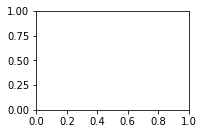

In [24]:
# Display image in the MNIST dataset
plot_num = 221
index = 0
while plot_num <= 224:
    plt.subplot(plot_num)
    plt.imshow(Flip_data[index], cmap=plt.get_cmap('gray'))
    plot_num += 1
    index += 1
# show the plot
plt.show()

# Large Convolutional Neural Network for MNIST

#### This step is to augment MNIST dataset to improve accuracy and help model become invariant to transformation

In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import numpy
K.set_image_dim_ordering('th')

In [54]:
# set Seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Reshape image
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize input from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encode outputs
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

## Feature standardization

In [8]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
FS_data = X_train 
datagen.fit(FS_data)

### ZCA Whitening

In [9]:
datagen_2 = ImageDataGenerator(zca_whitening=True)
ZCA_data = X_train
datagen_2.fit(ZCA_data)

/home/cpu11455-local/anaconda3/envs/py36/lib/python3.6/site-packages/keras_preprocessing/image.py:758: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


### Random Flips

In [23]:
datagen_3 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
Flip_data = X_train
datagen_3.fit(Flip_data)


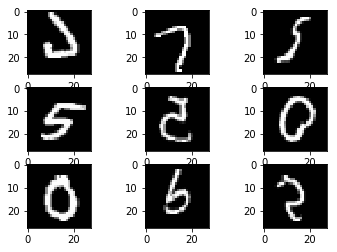

In [21]:
for X_batch, y_batch in datagen_3.flow(Flip_data, Y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

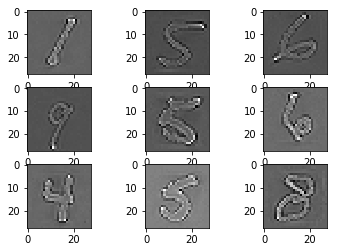

In [22]:
for X_batch, y_batch in datagen_2.flow(ZCA_data, Y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## Build model and train

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint
K.set_image_dim_ordering('th')

In [50]:
def cnn_model():
    # Create model
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(1,28,28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [55]:
model = cnn_model()
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200)
model.save_weights('weights.h5')
# Evaluate
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.3865 - acc: 0.8822 - val_loss: 0.0891 - val_acc: 0.9720
Epoch 2/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0988 - acc: 0.9699 - val_loss: 0.0550 - val_acc: 0.9820
Epoch 3/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0724 - acc: 0.9774 - val_loss: 0.0424 - val_acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0592 - acc: 0.9820 - val_loss: 0.0382 - val_acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0514 - acc: 0.9841 - val_loss: 0.0335 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0442 - acc: 0.9859 - val_loss: 0.0296 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0387 - acc: 0.9880 - val_loss: 0.0314 - val_acc